In [1]:
# Following closely from:
# https://github.com/rOpenGov/pollstR

library("devtools")
install_github("rOpenGov/pollstR")

library(pollstR)

# Define the slug for the election URL
slug <- "2016-general-election-trump-vs-clinton"

# Get polls from the API
elec_2016_polls <- pollster_chart_data(slug)

Skipping install of 'pollstR' from a github remote, the SHA1 (2cda953f) has not changed since last install.
  Use `force = TRUE` to force installation
Parsed with column specification:
cols(
  Trump = col_double(),
  Clinton = col_double(),
  Other = col_double(),
  Undecided = col_double(),
  poll_id = col_integer(),
  pollster = col_character(),
  start_date = col_date(format = ""),
  end_date = col_date(format = ""),
  sample_subpopulation = col_character(),
  sample_size = col_integer(),
  mode = col_character(),
  partisanship = col_character(),
  partisan_affiliation = col_character()
)


In [2]:
elec_2016_polls

Trump,Clinton,Other,Undecided,poll_id,pollster,start_date,end_date,sample_subpopulation,sample_size,mode,partisanship,partisan_affiliation
42,43,5,9,26811,IBD/TIPP,2016-11-04,2016-11-07,Likely Voters,1107,Live Phone,Nonpartisan,None
45,49,7,NA,26805,YouGov/Economist,2016-11-04,2016-11-07,Likely Voters,3669,Internet,Nonpartisan,None
43,46,5,6,26771,Bloomberg/Selzer,2016-11-04,2016-11-06,Likely Voters,799,Live Phone,Nonpartisan,None
46,49,3,2,26799,ABC/Post,2016-11-03,2016-11-06,Likely Voters,2220,Live Phone,Nonpartisan,None
44,50,5,1,26790,Monmouth University,2016-11-03,2016-11-06,Likely Voters,748,Live Phone,Nonpartisan,None
44,48,2,7,26784,FOX,2016-11-03,2016-11-06,Likely Voters,1295,Live Phone,Nonpartisan,None
39,44,9,8,26810,Ipsos/Reuters,2016-11-02,2016-11-06,Likely Voters,2195,Internet,Nonpartisan,None
43,47,5,5,26778,CBS/Times,2016-11-02,2016-11-06,Likely Voters,1426,Live Phone,Nonpartisan,None
46,49,5,NA,26785,UPI/CVOTER,2016-10-31,2016-11-06,Likely Voters,1625,Internet,Nonpartisan,None
44,51,NA,5,26770,NBC/SurveyMonkey,2016-10-31,2016-11-06,Likely Voters,70194,Internet,Nonpartisan,None


In [3]:
elec_2016_polls$diff = elec_2016_polls$Clinton - elec_2016_polls$Trump

In [4]:
mean(elec_2016_polls$Trump)

[1] 41.30319

In [5]:
mean(elec_2016_polls$Clinton)

[1] 46.44415

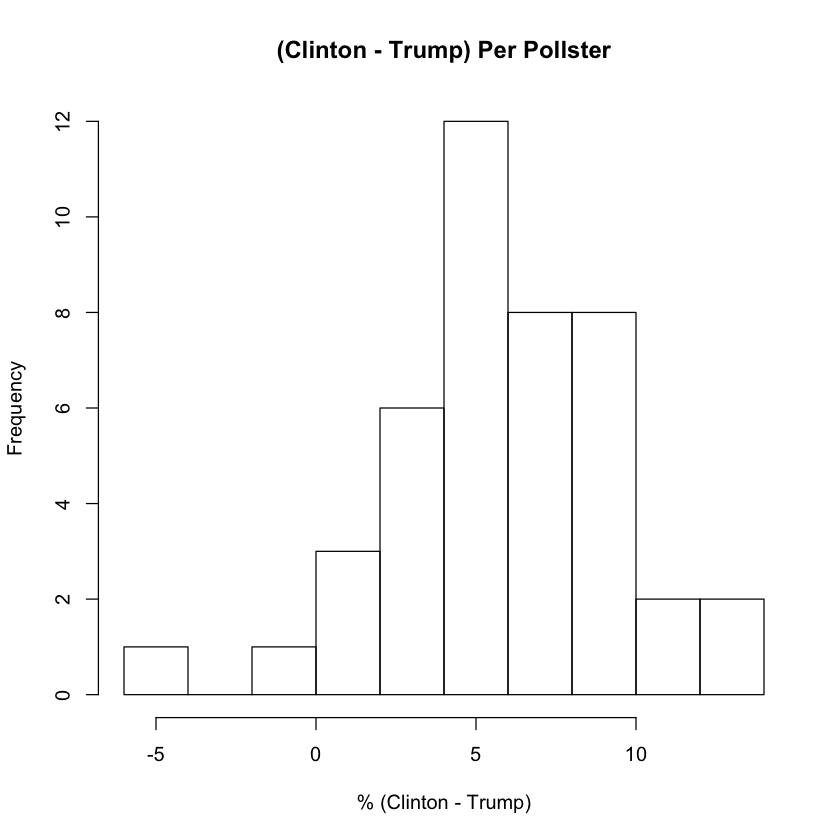

In [6]:
hist(with(elec_2016_polls, tapply(diff, list(pollster), mean, na.rm=TRUE)), main='(Clinton - Trump) Per Pollster', xlab='% (Clinton - Trump)')

In [7]:
library("ggplot2")
library("dplyr")
library("tidyr")

elec_2016_polls_tidy <-
  elec_2016_polls %>%
  gather(choice, value, one_of("Clinton", "Trump", "Undecided", "Other")) %>%
  mutate(date = start_date +
           difftime(end_date, start_date, units = "days") / 2) %>%
  filter(!is.na(value))
#glimpse(elec_2016_polls_tidy)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



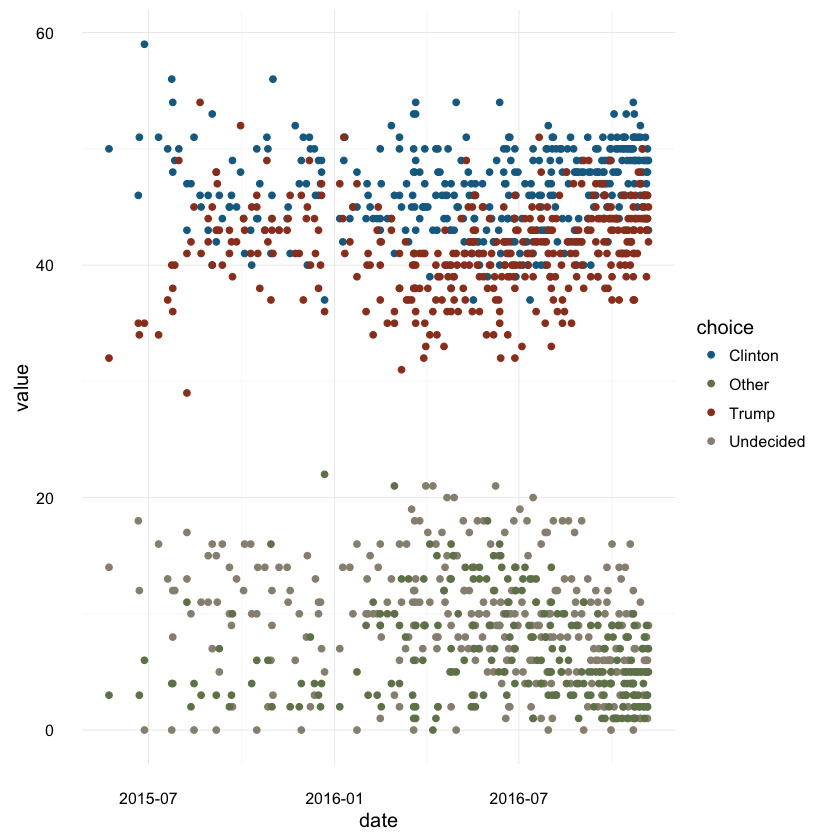

In [8]:
choice_colours <- c("Trump" = "#9A3E25", "Clinton" = "#156B90", "Other" = "#708259", "Undecided" = "#978F80")
scale_colour_elec_2016 <- function(...) {
  scale_colour_manual(values = choice_colours)
}
scale_fill_elec_2016 <- function(...) {
  scale_fill_manual(values = choice_colours)
}

plot_elec_2016_1 <-
  ggplot(elec_2016_polls_tidy, aes(x = date, y = value, colour = choice)) +
  geom_point() +
  scale_colour_elec_2016() +
  theme_minimal()
plot_elec_2016_1

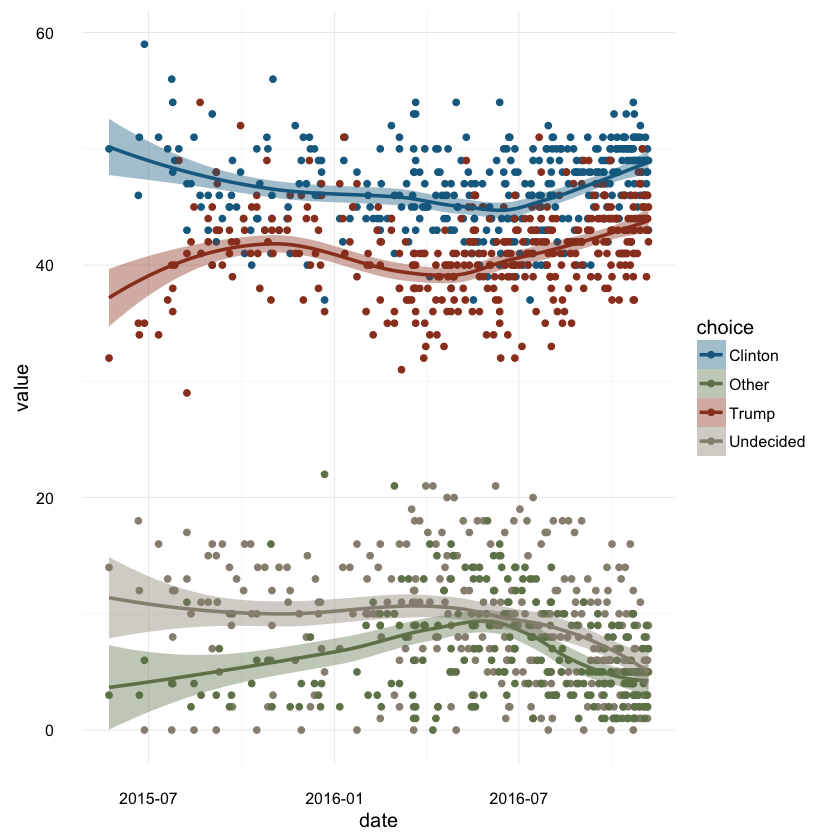

In [9]:
plot_elec_2016_1 +
  geom_smooth(aes(fill = choice), method = "loess") +
  scale_fill_elec_2016()